## JSON assignment
+ Using data in file 'data/world_bank_projects.json'
+ 1) Find the 10 countries with most projects
+ 2) Find the top 10 major project themes (using column 'mjtheme_namecode')
+ 3) In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

****
## Project assignment


In [44]:
# Load json file
json_data = json.load((open('/Users/HF/Documents/Education/Springboard/999_Json/world_bank_projects.json')))

# Normalize json and create a dataframe
json_n = json_normalize(json_data, 'mjtheme_namecode', ['countryname', 'countrycode'])

## Project task #3 (tasks 1 and 2 follow below)
+ You will notice that some entries have only the code and the name is missing
+ Student's coment: I decided to complete this task first at it belongs to data cleaning activities which are usually performed first

In [45]:
# Review NaN values
print(json_n.isna().sum())
# Visually review the dataframe
json_n

# NOTE: dataframe contains empty strings in the 'name' field

code           0
name           0
countryname    0
countrycode    0
dtype: int64


,code,name,countryname,countrycode
0,8,Human development,Federal Democratic Republic of Ethiopia,ET
1,11,,Federal Democratic Republic of Ethiopia,ET
2,1,Economic management,Republic of Tunisia,TN
3,6,Social protection and risk management,Republic of Tunisia,TN
4,5,Trade and integration,Tuvalu,TV
5,2,Public sector governance,Tuvalu,TV
6,11,Environment and natural resources management,Tuvalu,TV
7,6,Social protection and risk management,Tuvalu,TV
8,7,Social dev/gender/inclusion,Republic of Yemen,RY
9,7,Social dev/gender/inclusion,Republic of Yemen,RY


In [50]:
# Replace empty strings with NaN
json_n.replace("", np.nan, inplace=True)
# Sort the rows to be able to apply forward fill (ffill) to the NaN cells
json_n.sort_values(by=['code', 'name'], inplace=True, ascending=False)

# apply forward fill to fill the empty strings
json_n['name'] = json_n['name'].fillna(method='ffill')

# Review the empty cells -> no emty cells
print(json_n.isna().sum())
# Review the output df -> emty cells are filled with corresponding values
json_n

code           0
name           0
countryname    0
countrycode    0
dtype: int64


,code,name,countryname,countrycode
53,9,Urban development,Nepal,NP
183,9,Urban development,Kingdom of Morocco,MA
194,9,Urban development,Burkina Faso,BF
200,9,Urban development,Republic of Mozambique,MZ
318,9,Urban development,Republic of Benin,BJ
320,9,Urban development,Republic of Benin,BJ
341,9,Urban development,Republic of Honduras,HN
354,9,Urban development,Islamic Republic of Mauritania,MR
356,9,Urban development,Islamic Republic of Mauritania,MR
369,9,Urban development,Federative Republic of Brazil,BR


## Project task #1
+ Find the 10 countries with most projects

In [52]:
# Group the table by countries, count number of country occurences and sort in descending order
top_10_countries = json_n.groupby('countryname')['name'].count().sort_values(ascending=False)

# print 10 countries with most projects
print ('10 Countries With Most Projects: \n')
print (top_10_countries.head(10))

10 Countries With Most Projects: 

countryname
Republic of Indonesia              56
Republic of India                  51
Socialist Republic of Vietnam      43
Federative Republic of Brazil      41
People's Republic of Bangladesh    41
People's Republic of China         40
Africa                             39
Republic of Yemen                  34
Kingdom of Morocco                 32
Republic of Mozambique             31
Name: name, dtype: int64


## Project task #2
+ Find the top 10 major project themes (using column 'mjtheme_namecode')

Top 10 Major Project Themes: 

name
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: code, dtype: int64


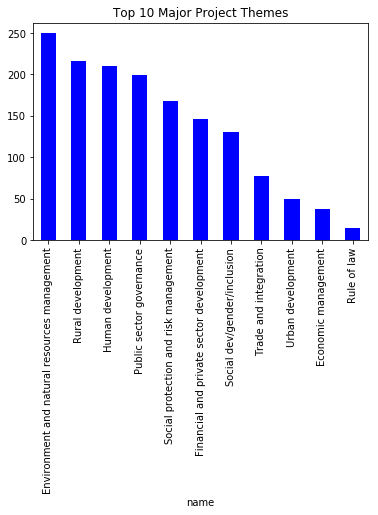

In [53]:
# Group the table by project themes, count number of occurences and sort in descending order
top_10_proj_themes = json_n.groupby('name')['code'].count().sort_values(ascending=False)

# print top 10 project themes
print ('Top 10 Major Project Themes: \n')
print (top_10_proj_themes.head(10))

# plot bar chart
top_10_proj_themes.plot.bar(color='blue', title='Top 10 Major Project Themes')

